In [2]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/Tables_des_ResultCurve_id_2.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,C8620916-9053-4775-9B6E-0085569CC174,0.015000,2.519566,130306B,O5515A8NG,NaN
1,C8620916-9053-4775-9B6E-0085569CC174,0.025000,2.440476,130306B,O5515A8NG,-7.908950
2,C8620916-9053-4775-9B6E-0085569CC174,0.035000,2.293596,130306B,O5515A8NG,-14.688051
3,C8620916-9053-4775-9B6E-0085569CC174,0.039800,2.239363,130306B,O5515A8NG,-11.298501
4,C8620916-9053-4775-9B6E-0085569CC174,0.045000,2.180611,130306B,O5515A8NG,-11.298501
...,...,...,...,...,...,...
10387,CEE0DC72-77C6-47BF-B29C-F9A1108D13A5,0.891667,14.021439,133808B,O5516122V,4.459934
10388,CEE0DC72-77C6-47BF-B29C-F9A1108D13A5,0.912333,14.091490,133808B,O5516122V,3.389550
10389,CEE0DC72-77C6-47BF-B29C-F9A1108D13A5,0.951667,14.202215,133808B,O5516122V,2.815050
10390,CEE0DC72-77C6-47BF-B29C-F9A1108D13A5,0.952000,14.202968,133808B,O5516122V,2.259700


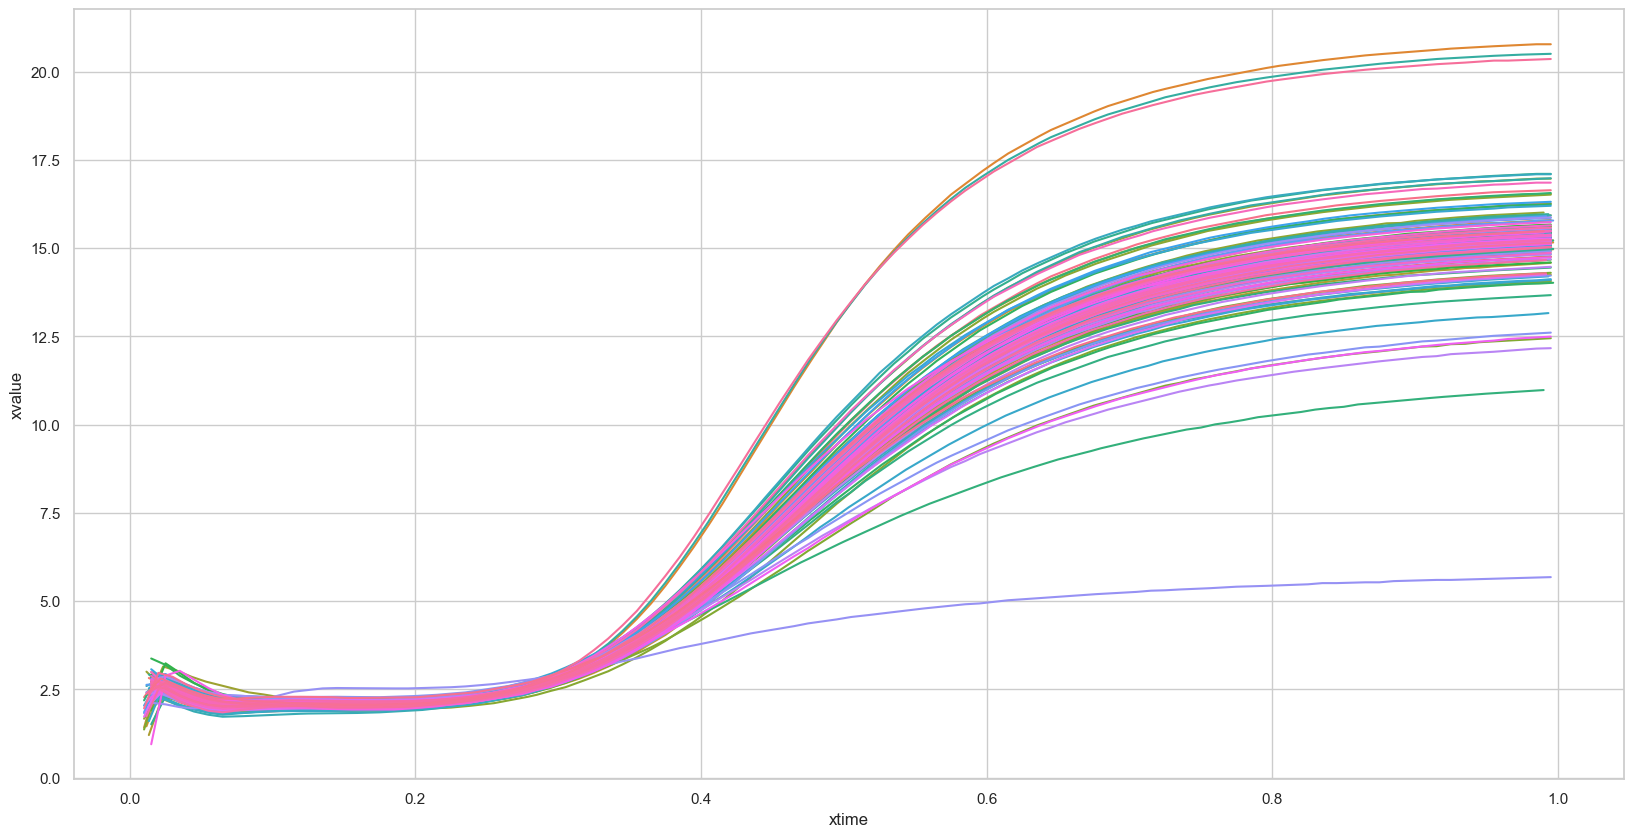

In [5]:
dessiner_commande(df)

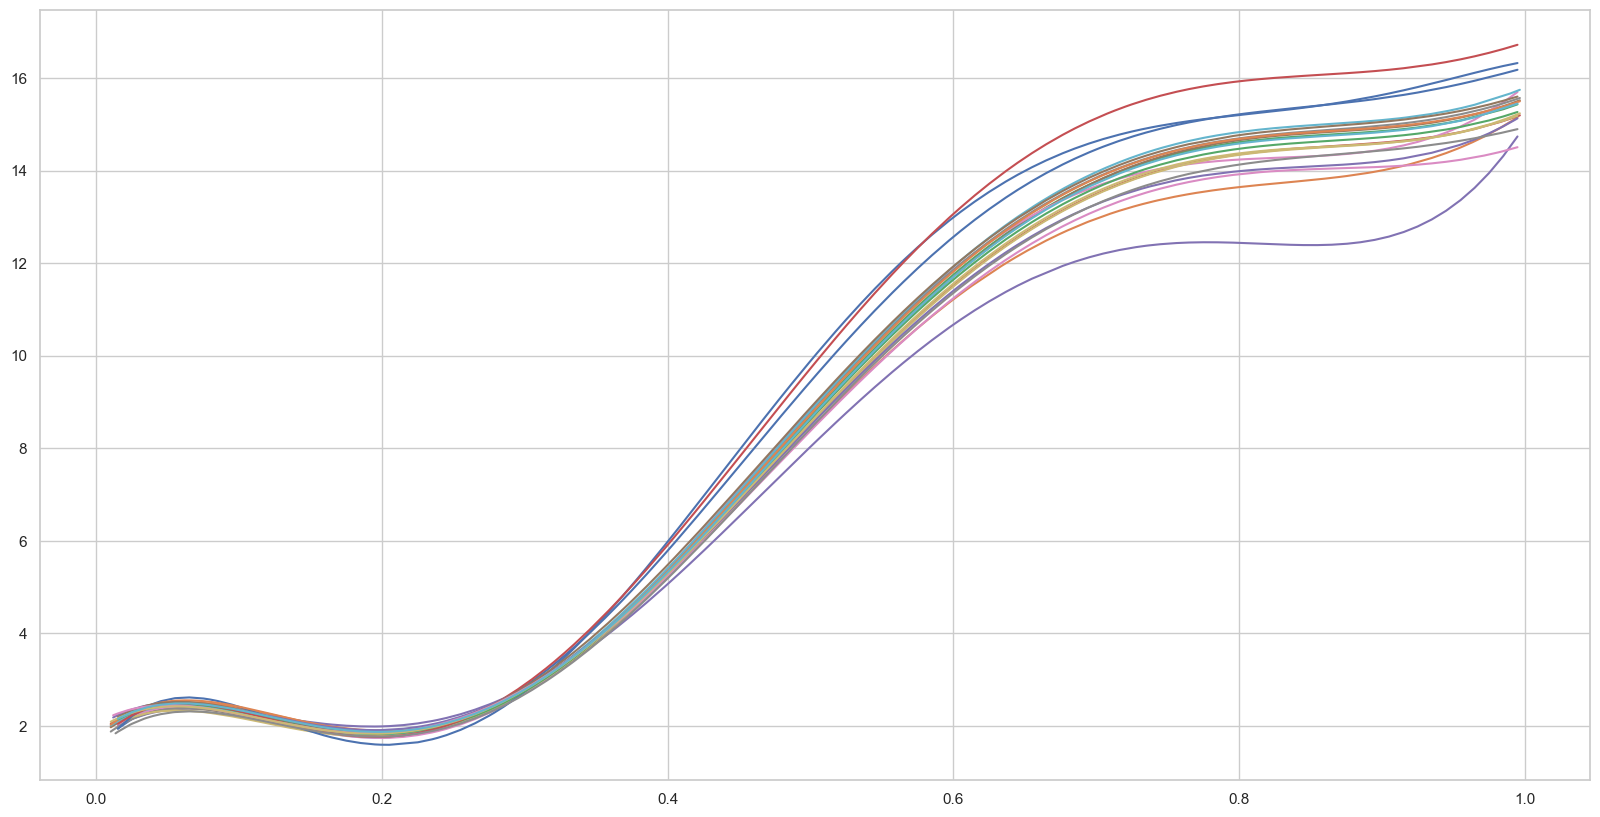

In [6]:
dessiner_commande(df,degree=6)

## Analyse des pentes

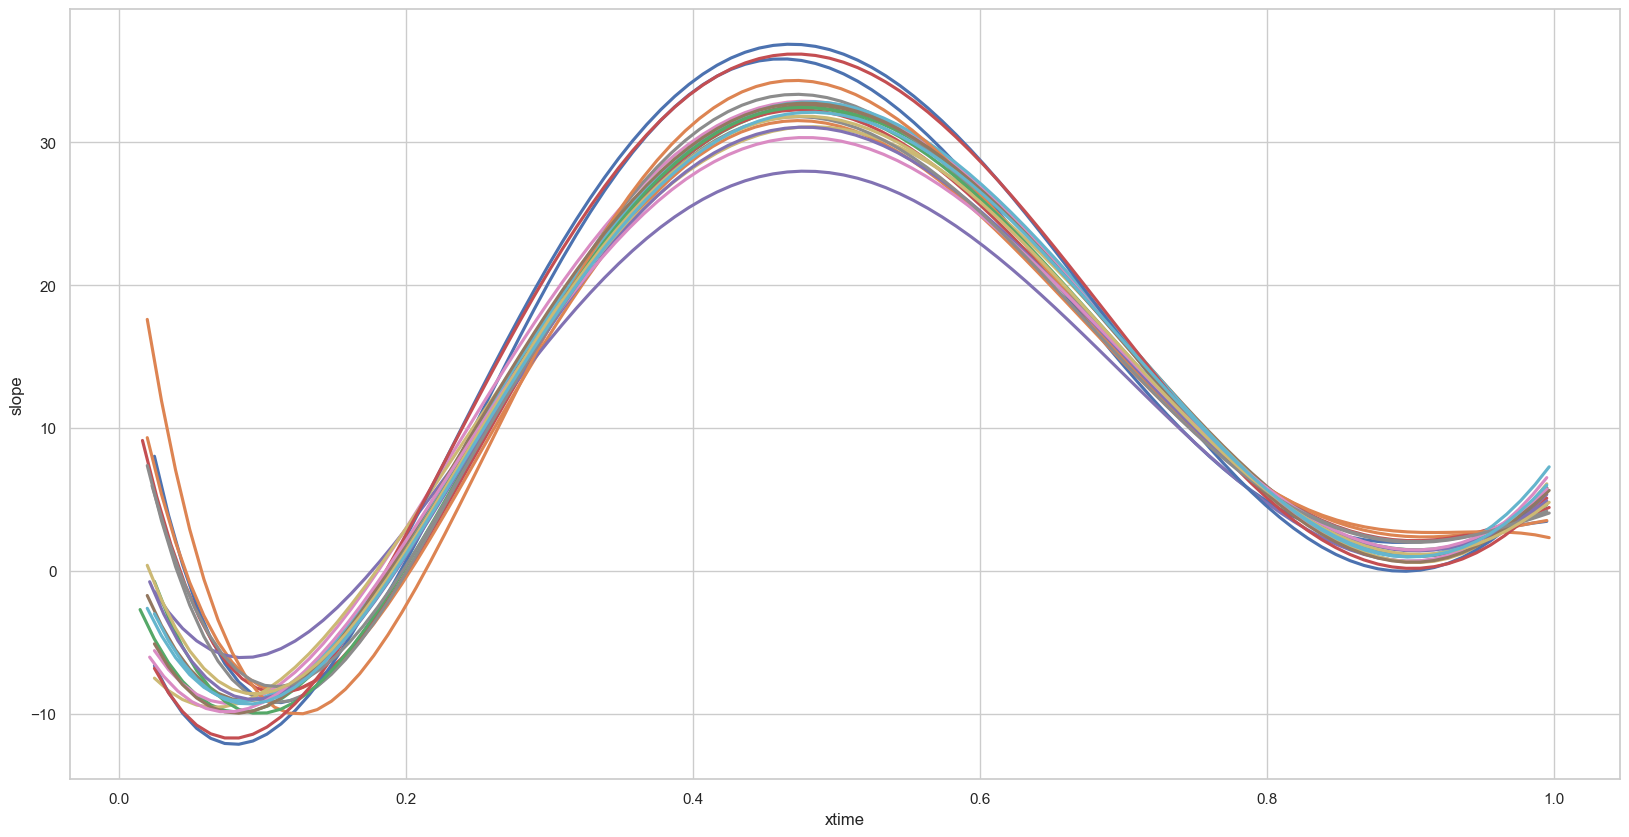

In [7]:
dessiner_commande_slope(df, 5, unified=True)

- Batch 140910B: 8.665857919732685
- Batch 162818B: 4.545739518569539
- Batch 131807B: 4.54236901694631
- Batch 130306B: 4.308132714595032
- Batch 164119B: 3.5388262180865806
- Batch 152214B: 3.5074061519099424
- Batch 135509B: 3.2713475819276168
- Batch 115902B: 3.2022999901681883
- Batch 153715B: 3.0109387604299123
- Batch 160917B: 2.950732272829474
- Batch 145312B: 2.816502990015404
- Batch 122904B: 2.7435238301338796
- Batch 150813B: 2.6744262500646974
- Batch 124805B: 2.4716260510361203
- Batch 121503B: 2.3945250088858807
- Batch 165120B: 2.1199043548449765
- Batch 142311B: 2.10880497582162
- Batch 133808B: 2.046126800800835
- Batch 114601B: 2.0272077209358943
- Batch 155216B: 1.9135488542355947


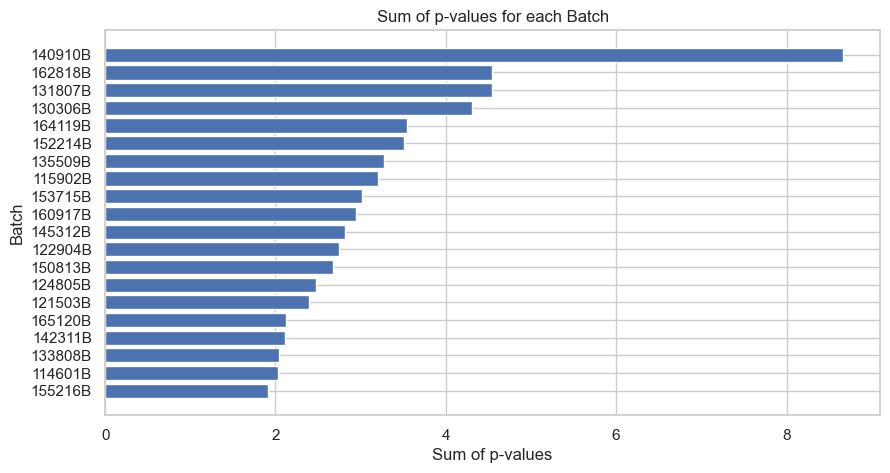

In [8]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

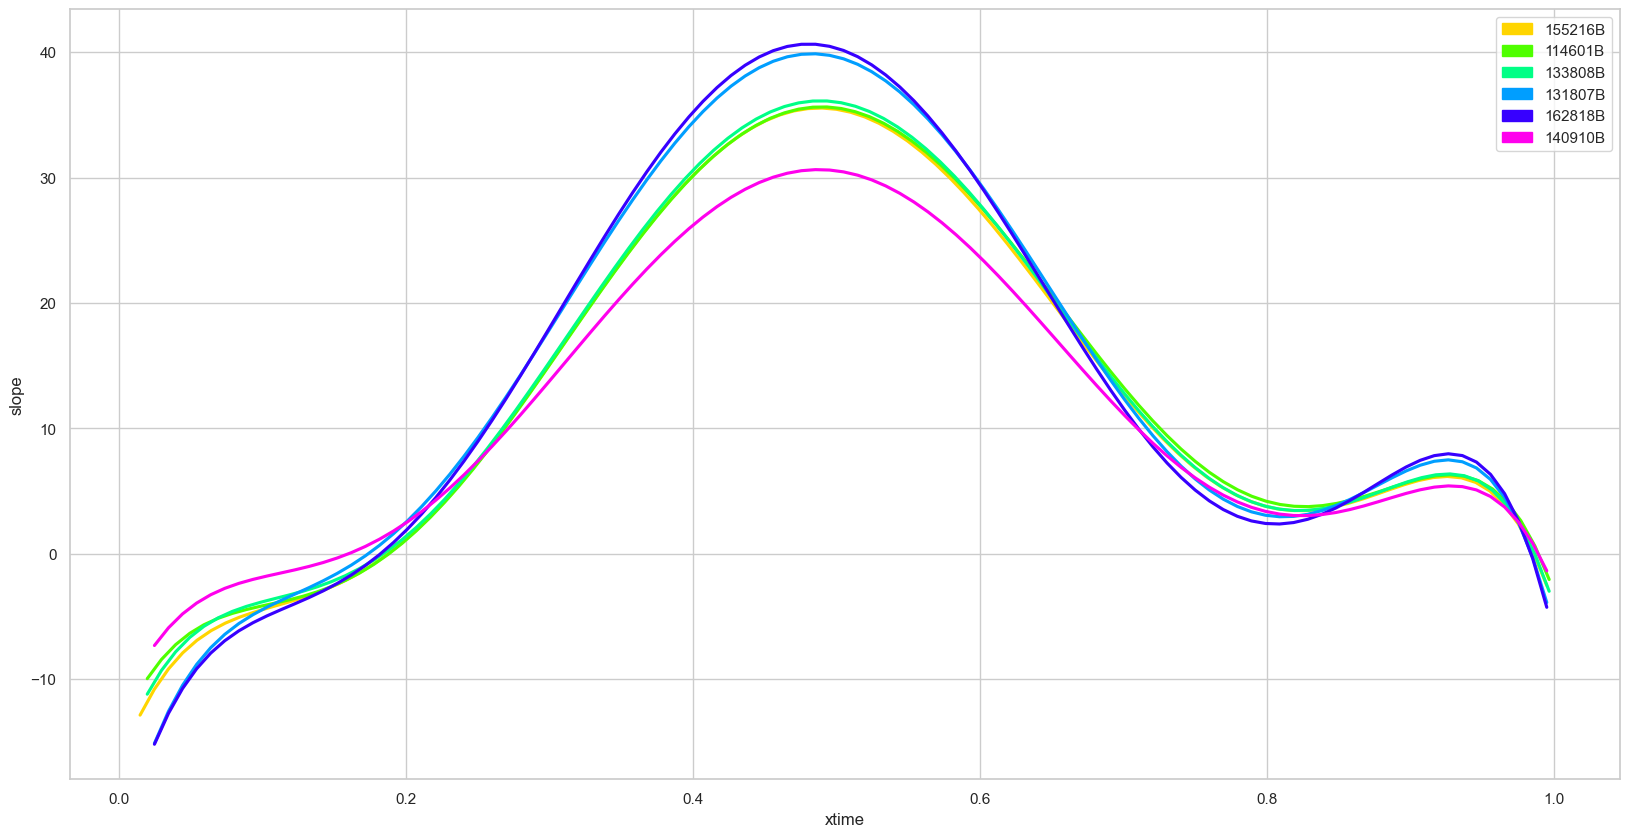

In [9]:
dessiner_batchs_slope(df, ['155216B', '114601B', '133808B', '131807B', '162818B', '140910B'], 6, unified=True)

- Batch 140910B: 22.286176093075316
- Batch 131807B: 8.131481887194724
- Batch 130306B: 4.682356781382785
- Batch 162818B: 4.62854373878765
- Batch 115902B: 4.402306680262791
- Batch 152214B: 4.244145725984615
- Batch 164119B: 4.230024682478199
- Batch 122904B: 3.480243588877194
- Batch 133808B: 2.9859819014374507
- Batch 150813B: 2.6715377404992737
- Batch 142311B: 2.596711776167379
- Batch 121503B: 2.552091961094549
- Batch 114601B: 2.4849260977359675
- Batch 145312B: 2.3835564141609304
- Batch 124805B: 2.3573224227757175
- Batch 160917B: 2.164208680653668
- Batch 153715B: 2.1635994347784115
- Batch 155216B: 2.01081746301705
- Batch 165120B: 1.871492444654914
- Batch 135509B: 1.7775578399248744


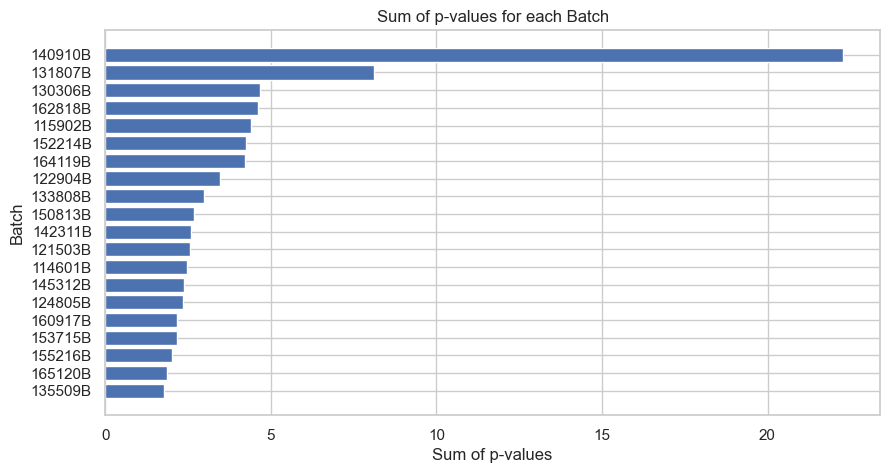

In [10]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

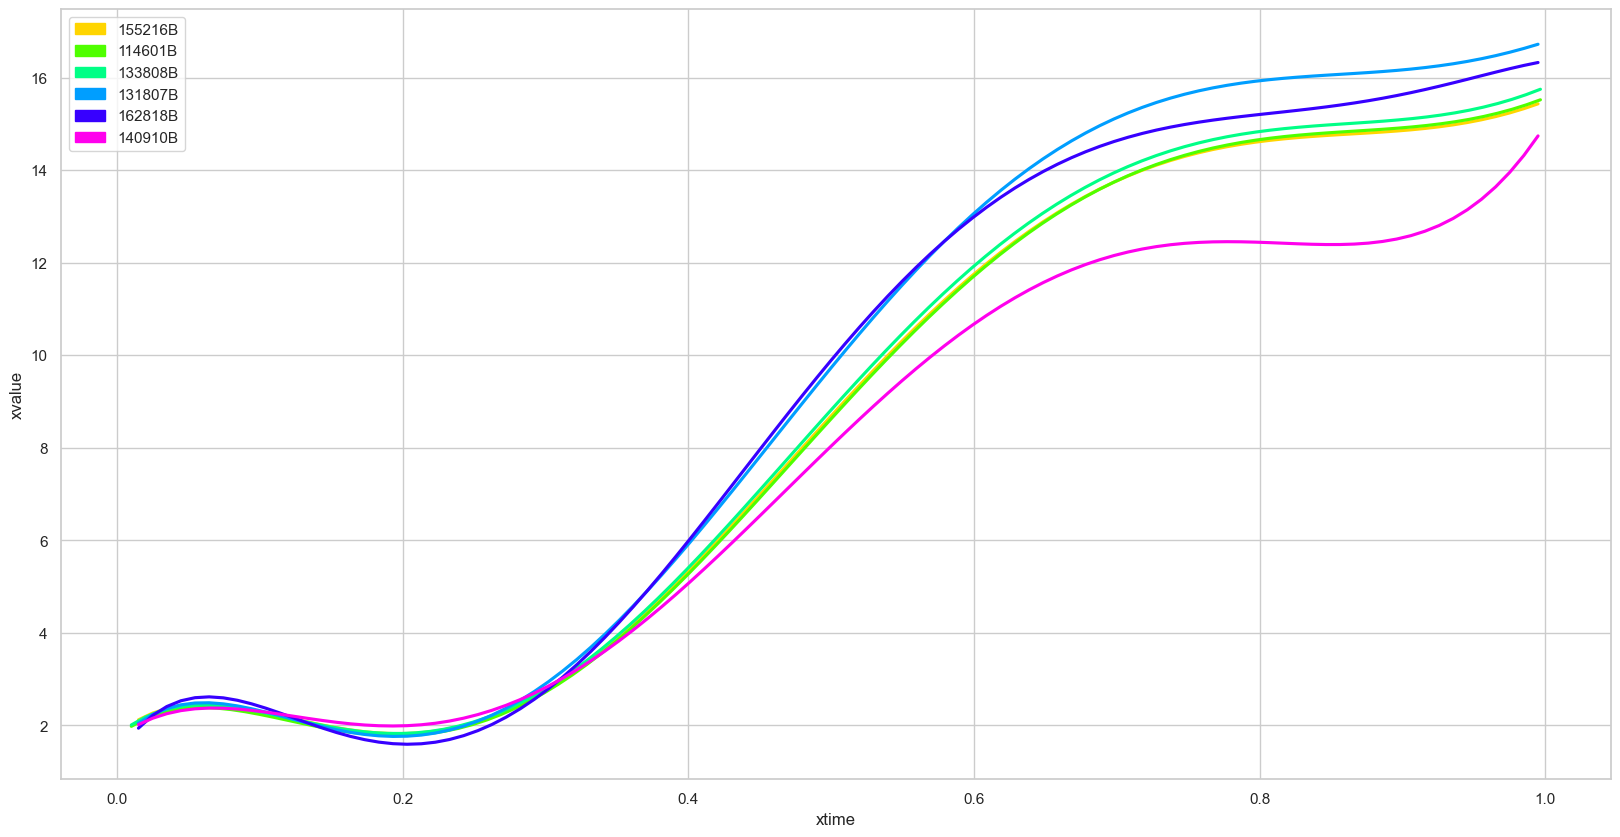

In [11]:
dessiner_batchs(df, ['155216B', '114601B', '133808B', '131807B', '162818B', '140910B'], 6, unified=True)

In [13]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence de temps entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence de temps entre les max des pentes des différentes batch est : 3.732 secondes


In [9]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(
        f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch] * 60, 3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 162818B est : 1.194 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 164119B est : 1.026 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 145312B est : 0.744 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 131807B est : 0.156 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 150813B est : 0.144 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 115902B est : 0.096 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 130306B est : 0.078 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 133808B est : 0.024 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 114601B est : 0.0 seconde
La différence de temps entre le max de la pente et la médiane pour

In [11]:
round(np.std(max_slope_sample_xtime)*60,3)

1.235

In [12]:
round(np.std(max_slope_batch_xtime)*60,3)

0.381